In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
try:
    conn = pyodbc.connect(
        'Driver={SQL Server};'
        'Server=DESKTOP-VOT1DO6\MSSQLSERVER_NEW;'
        'Database=BankDB;'
        'Trusted_Connection=yes;'
    )
    print("Connection Established")

except Exception as e:
    print("Connection Failed")

Connection Established


In [3]:
def getAccount():
    try:
        account = pd.read_sql_query('''
        SELECT * FROM Accounts
        ''',
        conn)
        df = pd.DataFrame(account)
        df.to_csv(r'C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/account.csv', index=False)
    except Exception as e:
        print(e)
        
def getBank():
    try:
        bank = pd.read_sql_query('''
        SELECT * FROM Bank
        ''',
        conn)
        df = pd.DataFrame(bank)
        df.to_csv(r'C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/bank.csv', index=False)
    except Exception as e:
        print(e)
        
def getCard():
    try:
        card = pd.read_sql_query('''
        SELECT * FROM Cards
        ''',
        conn)
        df = pd.DataFrame(card)
        df.to_csv(r'C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/card.csv', index=False)
    except Exception as e:
        print(e)
        
def getCustomer():
    try:
        customer = pd.read_sql_query('''
        SELECT * FROM Customers
        ''',
        conn)
        df = pd.DataFrame(customer)
        df.to_csv(r'C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/customer.csv', index=False)
    except Exception as e:
        print(e)
        
def getLoan():
    try:
        loan = pd.read_sql_query('''
        SELECT * FROM Loans
        ''',
        conn)
        df = pd.DataFrame(loan)
        df.to_csv(r'C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/loan.csv', index=False)
    except Exception as e:
        print(e)
        
def getService():
    try:
        service = pd.read_sql_query('''
        SELECT * FROM Services
        ''',
        conn)
        df = pd.DataFrame(service)
        df.to_csv(r'C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/service.csv', index=False)
    except Exception as e:
        print(e)
        
def getTransaction():
    try:
        transaction = pd.read_sql_query('''
        SELECT * FROM Transactions
        ''',
        conn)
        df = pd.DataFrame(transaction)
        df.to_csv(r'C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/transaction.csv', index=False)
    except Exception as e:
        print(e)


In [4]:
getAccount()
getBank()
getCard()
getCustomer()
getLoan()
getService()
getTransaction()

C:\Users\Ezra Muir\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Ezra Muir\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Ezra Muir\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Ezra Muir\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase st

In [5]:
# # Reading all "*/.csv"

# # specifying the path to csv files
# path = "C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/"
  
# # csv files in the path
# files = glob.glob(path + "/*.csv")
  
# # defining an empty list to store 
# # content
# data_frame = pd.DataFrame()
# content = []
  
# # checking all the csv files in the 
# # specified path
# for filename in files:
    
#     # reading content of csv file
#     # content.append(filename)
#     df = pd.read_csv(filename, index_col=None)
#     content.append(df)
  
# # converting content to data frame
# data_frame = pd.concat(content)
# print(data_frame)

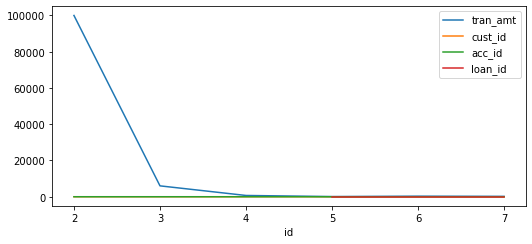

In [6]:
df_transaction = pd.read_csv("C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/transaction.csv")

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ['id', 'tran_dt', 'tran_amt', 'cust_id', 'acc_id', 'loan_id']

df_transaction.set_index('id').plot()

plt.show()

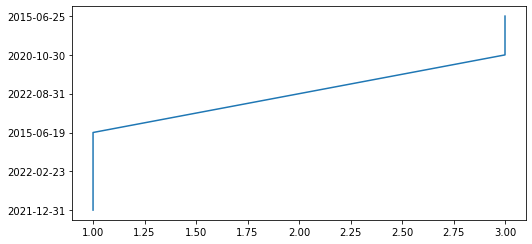

In [7]:

plt.plot(df_transaction.cust_id, df_transaction.tran_dt)

Text(0, 0.5, 'Transaction Date')

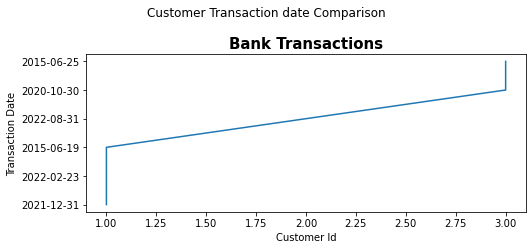

In [8]:
# Adding Titles
plt.plot(df_transaction.cust_id, df_transaction.tran_dt)
plt.suptitle('Customer Transaction date Comparison')
plt.title('Bank Transactions', fontdict={'fontsize':15,'fontweight':'bold'})
plt.xlabel('Customer Id')
plt.ylabel('Transaction Date')

In [9]:
# Plotting multiple files
data_blue = pd.read_csv("C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/account.csv")
data_red = pd.read_csv("C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/loan.csv")
data_aqua= pd.read_csv("C:/Users/Ezra Muir/Documents/Training-Work/Python/Nov_Learn/SQL To Diagram/customer.csv")

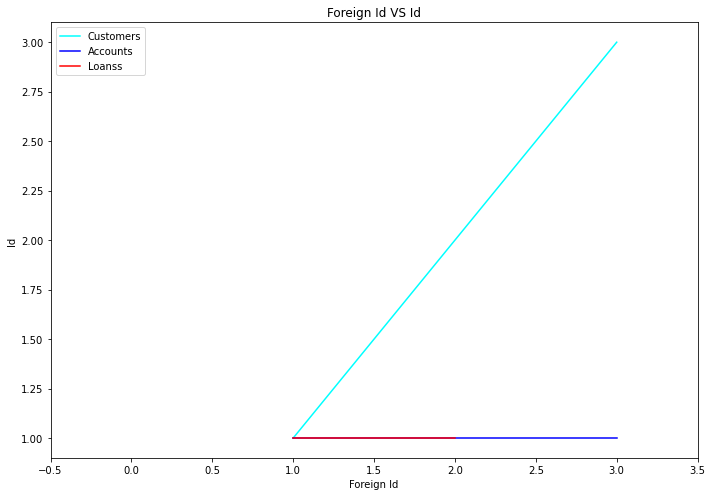

In [10]:
plt.figure(figsize=(10, 7))   # Set the size of your plot. It will determine the relative size of all the labels.

plt.plot(data_aqua['id'], data_aqua['acc_id'], color="aqua", label="Customers")
plt.plot(data_blue['id'], data_blue['bank_id'], color="blue", label="Accounts")
plt.plot(data_red['id'], data_red['bank_id'], color="red", label="Loanss")

plt.xlabel("Foreign Id")
plt.xlim((-0.5, 3.5))
plt.ylabel("Id")
plt.legend(loc="upper left")
plt.title("Foreign Id VS Id")
plt.savefig("ID_curves.pdf")
plt.show()